## SVM - Support Vector Machines

### Notes from Scott's lectures

### Notes from ISLR chapter 9

Another way of doing classification:

Goal is to find the plane that separates the classes in feature space. 
When  the outcome is not clear with initial try, there are 2 workarounds. 
1. Soften what is meant by separate.
2. Blow up the feature space (enrich or enlarge) so separation is possible. 

What is a hyperplane?
* A flat affine subspace of dimension p -1 
* General equation is:

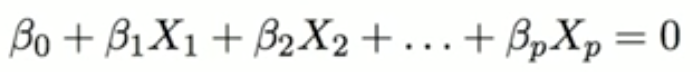

* When p = 2 the hyperplane is a line
* If beta 0 = 0 the hyperplane goes through the origin, else it does not.
* Beta = (Beta1, Beta2, …Beta p) called a normal vector. 
    * Orthogonal to the direction of the hyperplane

How to pick which hyperplane to use?
* Maximal Margin Classifier:
    * Of all the hyperplanes, find the one that makes the biggest gap between the classes.

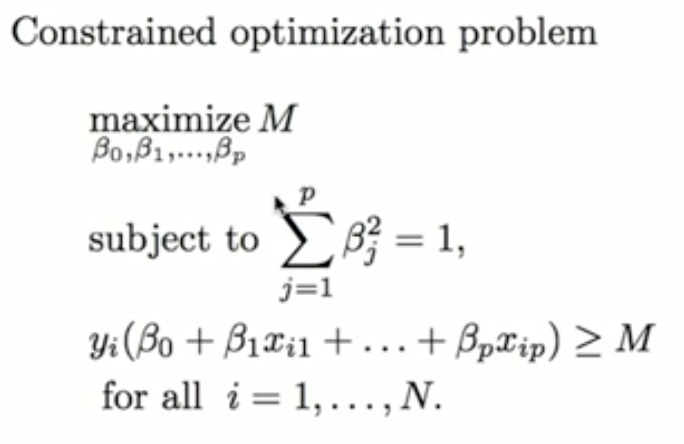


    * Can be rephrased as a convex quadratic program. Solves efficiently.

How to fit non-seperable data:

* 2 kinds of issues:
    * 1. Data is mixed together
    * 2. Data is noisy because it comes too close to the other area causing the line to shift dramatically that separates the 2 classes. Sort of like what happens with a high leverage point in linear regression. 
* Use a Support Vector Classifier
    *  Soften the area that separates the classes.
        * This allows some points to reside inside the area between the hyperplane and the class separation lines. 
        * We do this using a budget.
        * Instead of being = 1, we say M(1 - ei) 

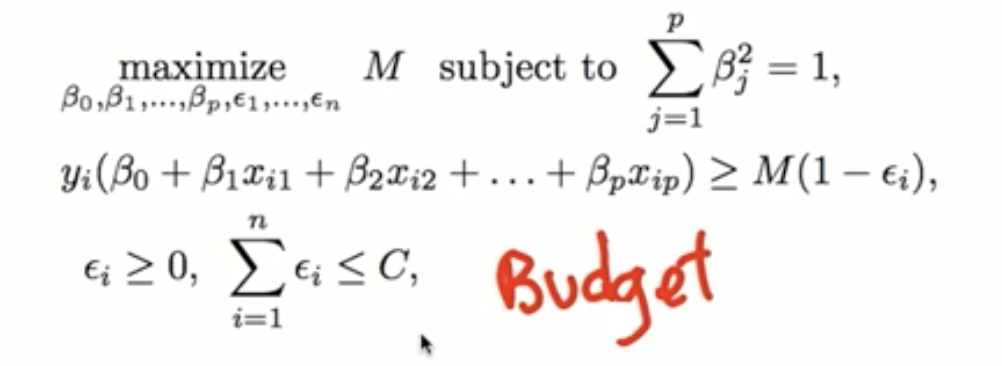

        * C is a regularization parameter.
    * Variables should be standardized first.
        * Treats all variables as the same, so the units count.
        * Same as lasso.
    * Sometimes no matter what is done, there is not clear boundary. 

What to do when the boundary is not clear:
* Feature Expansion:
    * Polynomial expansion:
        * Add X^2, X^3, X1X2, X1X^2 etc. 
        * Go from p-dimensional space to M>p space
    * Fit classifier to the enlarged space
    * Non-linear decision boundaries
* This leads to non-linear decision boundaries (quadratic conic sections)
* Polynomials (esp. high dimensional ones) get wild fast. 
* There is a more elegant controlled way through Kernels.
* Need to understand inner products.
    * Similar to lasso but a little different, the inner products operate on the data points that fall between the 2 margins, where as the lasso operates on the coefficients. 
* Kernels:
    * If we can compute inner products, then we can fit a SV (support vector) classifier.
    * Kernel functions

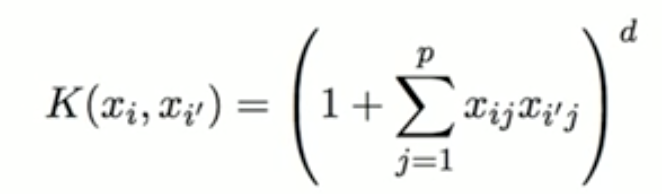

    * Radial Kernel:
        * One of the most popular
        * Can handle infinitely high dimensionality.
            * Without the inner products and kernel method, this would not be possible.
    * There are other Kernel’s but most people use the Radial.

    * Tuning Parameters:???

* SVMs” more than 2 classes?
    * OVA:


    * OVO



Notes from Scott

Hard Margin Support Vector Classifier
* [4]
* Separating Hyperplane *perfectly* seperable data chosen to maximize margin (minimize magnitude of ||w||)

* [3]
* math problem where w defines hyperplane and ||w|| defines margin
    * constrained (points not in margin) optimization problem (minimize ||w||)
        * this is the character of the algorithm

* [2] 
* w is a “weighted average” of the support vectors
    * all other data points are given weight of 0, and don’t contribute to the w


* very demanding algorithm because of Q to find the weights. 
    * With 50K churn data points it took scott 15 minutes to calculate.
    * for each data point it is n*n*d(dimension) calculations because it is X’X times every other vector n^2  in our case it is 50,000^2 turns into 52 billion calculations. 


* [1]
* constrained optimization is done with Lagrangian, and results in a quadratic programming problem


* always seems parametric to scott. because of the hyperplane is a straight line like a linear model that is defined by the points maybe only 2 data points that define the whole model. and can have huge effects to predicting outside because a slight change or movement of 1 point, or adding a point can shift the line that then with a small change can have a large effect the farther away from the controlling points we get. so a small half inch change near the source of control can translate to a foot farther away. 

* prone to overfitting because it relies on only a few points. 

* assumption that “widest margin” is the best

* SVM’s are usually only used in a classification context. The regression model is hardly used.
    * the kernel trick is what is going to make it useful and perform a little better. 

### What about categorical/indicator data?

### What about data on different scales?


Soft Margin Support Vector Classifier (SVM):
* Large C means smaller margin because C is the complexity penalty multiplier
* larger C means fewer support vectors

* Decrease C to make the separating hyperplane use more data in its estimation calculation
    * allows some data points to cross over the line into the classification territory of the other color.  
* democratization of the estimation. 
    * if we decrease C we make the decision based on more people other than those just on the edge sepeaating groups.
* C is therefore the regularization parameter.

* imbalanced class sizes result in different separating hyperplanes

When working with imbalanced class sizes we can do the following:
1. predict new points of smaller class.
2. weigh the points of the smaller class heavier
3. remove some of the points from the larger class.
4. OR do nothing: less to defend, a cleaner method. but what predicts best should probably win. 
    1. calculate the cut line as usual. with no changing  in 1 - 3 above
    2. Then use a threshold. 
        1. do the prediction. either a 1 or a 0. 1 is positive, and when the number is more positive meaning the point is farther away from the line, then we can increase the base number needed in order for the point to be classified as 1 or 0. So we could set a limit of 5 as the threshold and the point would have to be 5.01 or greater to be a 1 otherwise it is a 0.
        2. This can be done with any classification.

Kernel Trick:
* take data project into multi-dimensional space and then perform the split.

* what happens when we have a 1 dimensional line with the middle red and the 2 outside parts red? 
    * when we go to make a cut, we can only make 1 cut, so which cut do we make to the left or right of the middle red section. 
    * We can take the straight line of 1 dimension and project it into 2 dimensional space, and doing this will create a u-shaped curve, that allows then for a single cut at the bottom does a good job of lopping off the red section. 

* radial basis function:
    * small "gamma” means less flexible transformation
        * more connected smoother islands.
    * large “gamma” means more flexible trans formation
        * less connected tighter islands.
        * a higher gamma adds weight to higher order terms making them more competitive. 
            * this is because it removes some of the weight of the denominators factorial pull. 
            * this becomes a dial to draw in more of the terms into importance of the model or turning more of them off. 
            * aka effectively controls the diminishing of dimensionality in the rbf-related transformation.

    * Need to loop through C and through gamma to find the optimal setting for the data set working with.
        * computationally expensive it may not be feasible to score all parameters.
        * scott had to downsample data to get it to work on laptop.
 
* for Polynomial kernel:
    * large d means more "spiky/sharper” curves. more flexible transformations
    * small d means smoother curves: less flexible transformations
    * d directly defines the dimensionality of the projection/transformation


Covered so Far - Scott:
* SVC’s provide a “best” separating hyperplane that maximized the “margin” between classes
    * they are an elegant solution to the classification problem
* soft margin SVCs use a penalty C to control the amount of violation of the margin
    * increasing the margin regularized the estimation via the separating planes reliance on blunt data characteristics
* Cross-Validation can be used to tune C and assess model estimate variation
    * this allows us to assess overfitting
* The “kernel Trick” projects our prediction space into another space where we can calculate the inner product using only the variables of the original space. 
    * this allows us to readily leverage non-linearly transformed variable spaces
    * and, makes SVMs powwerful and flexible class of “out of the box” solutions

can set up a math problem that will define the hyperplane as well as the width. 
hyperplane is defined by support vectors through a weighted average of support vectors. 

